In [4]:
import cv2
import numpy as np
from scipy import misc

img = misc.ascent()

<function matplotlib.pyplot.show(close=None, block=None)>

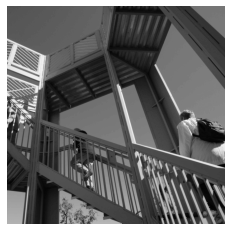

In [5]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show

In [14]:
imgTransformed = np.copy(img)
sizeX = imgTransformed.shape[0]
sizeY = imgTransformed.shape[1]
print(f'Image dimensions: {sizeX} x {sizeY}')

Image dimensions: 512 x 512


In [10]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

512 512


In [16]:
for x in range(1, sizeX-1):
  for y in range(1, sizeY-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (img[x, y-1] * filter[0][1])
      convolution = convolution + (img[x + 1, y-1] * filter[0][2])
      convolution = convolution + (img[x-1, y] * filter[1][0])
      convolution = convolution + (img[x, y] * filter[1][1])
      convolution = convolution + (img[x+1, y] * filter[1][2])
      convolution = convolution + (img[x-1, y+1] * filter[2][0])
      convolution = convolution + (img[x, y+1] * filter[2][1])
      convolution = convolution + (img[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution < 0):
        convolution = 0
      if(convolution > 255):
        convolution = 255
      iTransformed[x, y] = convolution


TypeError: 'type' object is not subscriptable